In [1]:
from model import TIPINN_Cooling
import matplotlib.pyplot as plt

In [2]:
phys_losses = [True, False]
topo_losses = [True, False]
records = []
for pl in phys_losses:
    for tl in topo_losses:
        print(f"\n{pl=}, {tl=}")
        epochs = 15_000
        cooling = TIPINN_Cooling(phys_loss=pl, topo_loss=tl, lr = 1e-5, epochs=epochs, dim = 1)
        losses = cooling.fit(cooling.t, cooling.T)
        predict = cooling.predict(cooling.times)
        data = {'phys_loss': pl, 'topo_loss': tl, 'losses': losses, 'prediction': predict, 'times': cooling.times}
        records.append(data)


pl=True, tl=True
Epoch 0/15000, loss: 2174.37


KeyboardInterrupt: 

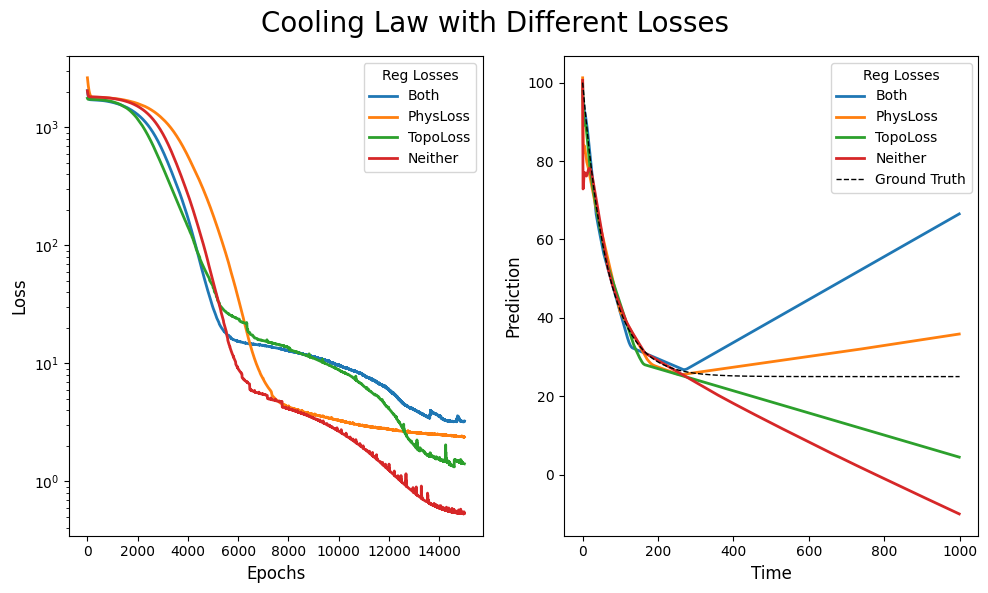

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
for record in records:
    xs = range(len(record['losses']))
    ys = range(len(record['prediction']))
    if not record['topo_loss'] and record['phys_loss']:
        label = "PhysLoss"
    elif not record['phys_loss'] and record['topo_loss']:
        label = "TopoLoss"
    elif not record['topo_loss'] and not record['phys_loss']:
        label = 'Neither'
    elif record['topo_loss'] and record['phys_loss']:
        label = "Both"
    ax[0].plot(xs, record['losses'], label = label, lw = 2)
    ax[1].plot(ys, record['prediction'].numpy().flatten(), label = label, lw = 2)

ax[0].set_ylabel("Loss", fontsize = 12)
ax[0].set_xlabel("Epochs", fontsize = 12)
ax[0].set_yscale('log')
ax[0].legend(title = 'Reg Losses')

ax[1].set_ylabel('Prediction', fontsize = 12)
ax[1].set_xlabel("Time", fontsize = 12)
ax[1].plot(record['times'], cooling.temps, label = 'Ground Truth', lw = 1, color = 'black', linestyle = '--')
ax[1].legend(title = 'Reg Losses')
plt.suptitle("Cooling Law with Different Losses", fontsize = 20)
plt.tight_layout()
plt.show()